### Import Necessary Libraries and Dataframe

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [2]:
# Import Dataframe
df = pd.read_csv("diwali_sales.csv", encoding='unicode_escape')

In [3]:
df.shape # View the shape(row,column) of the dataframe

(11251, 15)

In [4]:
df.head(5) # Show top 5 rows

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info() # Dataframe details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Data Cleaning

In [6]:
# Remove unnecessary columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [7]:
pd.isnull(df).sum() # Retuens total number of null values in a column

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# Remove rows with null value
df.dropna(inplace=True)

In [9]:
df['Amount'] = df['Amount'].astype('int') # Change Data type

In [10]:
df['Amount'].dtypes # Show data type of column

dtype('int32')

In [11]:
df.columns # Show all the columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
 # Rename Column
df.rename(columns={'Marital_Status':'Biye'},inplace=True)

In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Biye,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [14]:
df[['Age','Orders','Amount']].describe() # Describe Specific Columns
# df.describe() # Describe all Columns

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Data Analysis

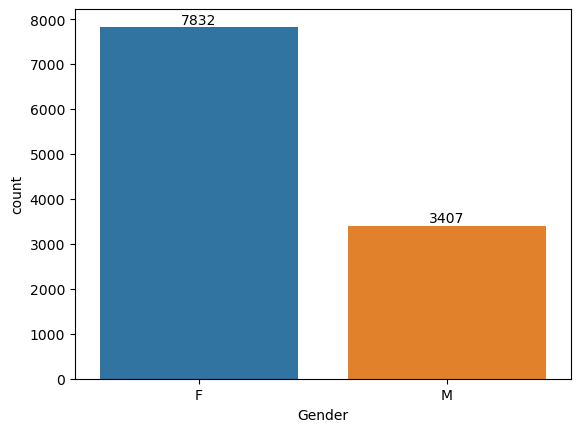

In [20]:
# Show bar diagram of number of male and female
ax = sns.countplot(x = 'Gender' ,data=df)

for bar in ax.containers:
    ax.bar_label(bar)

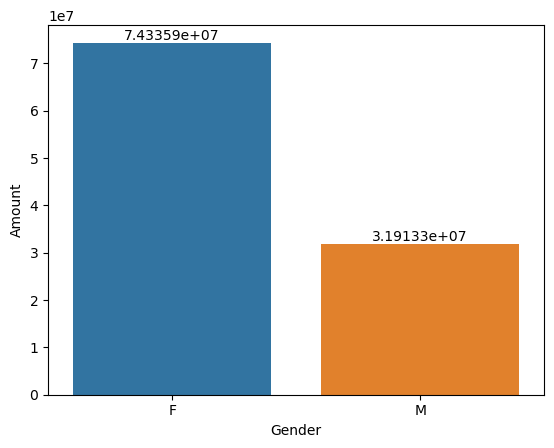

In [27]:
# Gender-wise sales bar
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum()

ax = sns.barplot(x='Gender',y='Amount',data = sales_gen)

for bar in ax.containers:
    ax.bar_label(bar)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

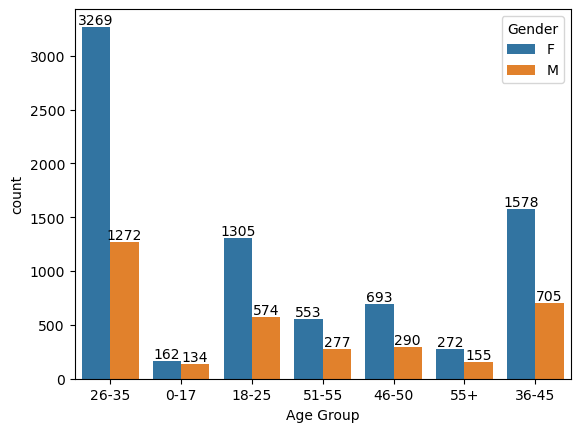

In [35]:
# Visualize different age groups of customers to determine which age group is more active buyers with their gender
ax = sns.countplot(x='Age Group',data=df, hue='Gender')

for bar in ax.containers:
    ax.bar_label(bar)

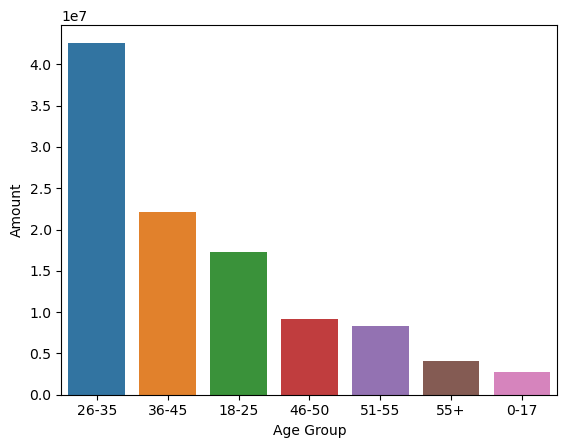

In [41]:
# Age-group sales bar
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

ax = sns.barplot(x='Age Group',y='Amount',data = sales_age)

*From the above graphs we can see that most of the buyers are of age group between 26-35 years female*

<Axes: xlabel='State', ylabel='Orders'>

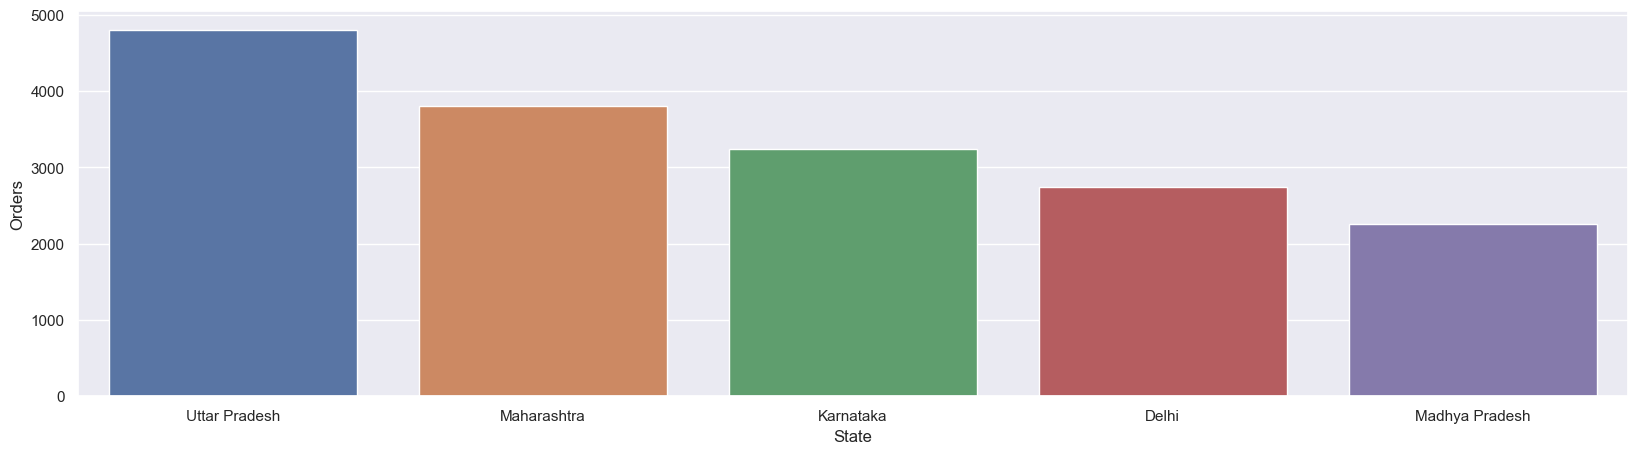

In [62]:
# Find the top 10 states order wise
sales_state = df.groupby('State',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x='State',y='Orders',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

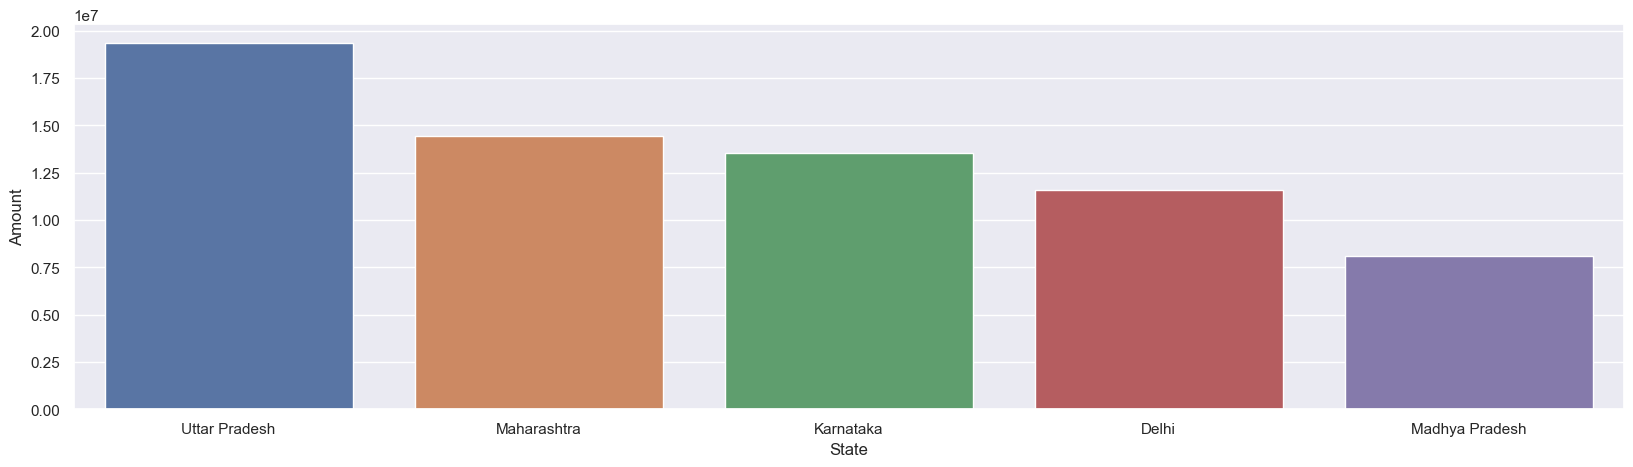

In [61]:
# Find the top 10 states amount wise
sales_state = df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)

sns.barplot(x='State',y='Amount',data=sales_state)

*From above graphs we can see that most of the orders and total sales amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

<Axes: xlabel='Biye', ylabel='Amount'>

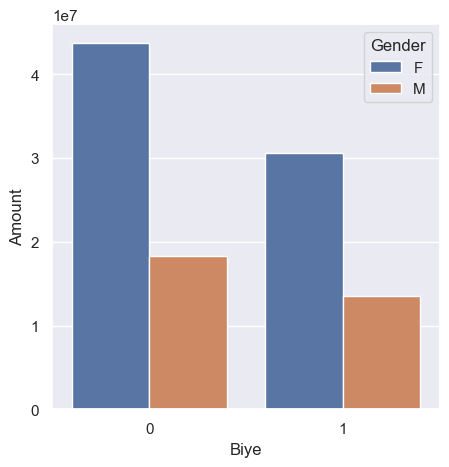

In [72]:
# Find sales with respect marital status
sales_biye = df.groupby(['Biye','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'Biye',y='Amount',hue='Gender',data=sales_biye)

*From graphs above we can see that most of the buyers are **married women** and they have high purchasing power*

In [65]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Biye,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


<Axes: xlabel='Occupation', ylabel='Amount'>

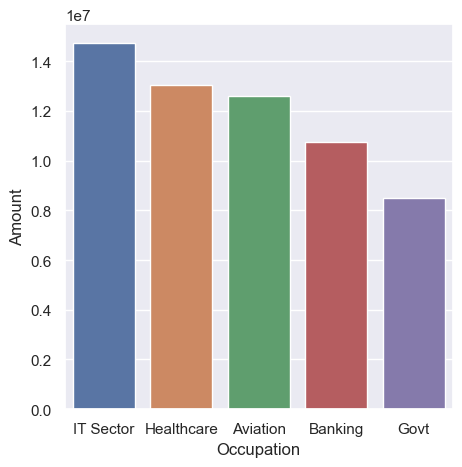

In [73]:
# Find sales with respect to Occupation
sales_occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head()

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'Occupation',y='Amount',data=sales_occupation)

*From graphs above we can see that people in IT Sector, Healthcare and Aviation have high purchasing power*

<Axes: xlabel='Product_Category', ylabel='Orders'>

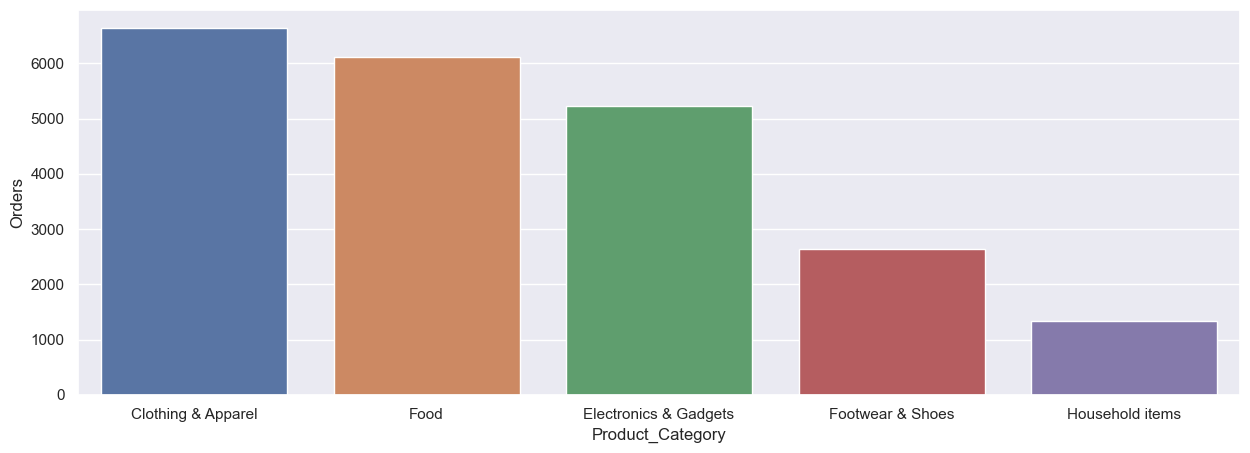

In [79]:
# Find the most sold product categories
sales_category = df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Product_Category',y='Orders',data=sales_category)

### Conclusion

*Married women age group 26-35 years from UP, Maharastra and Karnataka working in IT, Healthcare and Aviathon are more likely to buy products from Food, Clothing and Electronic category.*